# o presente trabalho propõe uma aplicação que utiliza Modelos de Linguagem de Grande (LLMs) para auxiliar na avaliação psicológica automatizada, com foco na detecção de sintomas depressivos.

A aplicação tem como principal funçao aplicar um questionario psicologico similarmente a um profissional humano.

Aplicação do Questionário PHQ-9 com LLM:
O PHQ-9 é um questionário amplamente utilizado na triagem de sintomas de depressão. O LLM conduz a entrevista simulada com o usuário, interpretando suas respostas e atribuindo pontuações conforme os critérios clínicos estabelecidos. A soma dessas pontuações fornece um indicativo de gravidade dos sintomas depressivos, que pode variar de leve a severo.
A escala de pontuaçao do questionario vai de 0 a 27 pontos, que indica que o usuario pode ser classificado em varios niveis de depressao.



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

# Gerando dados artificiais

In [ ]:
np.random.seed(42)
pontuacoes = np.random.normal(loc=10, scale=5, size=500)
pontuacoes = np.clip(pontuacoes, 0, 27)  # PHQ-9 vai de 0 a 27

# Histograma com curva de distribuição normal

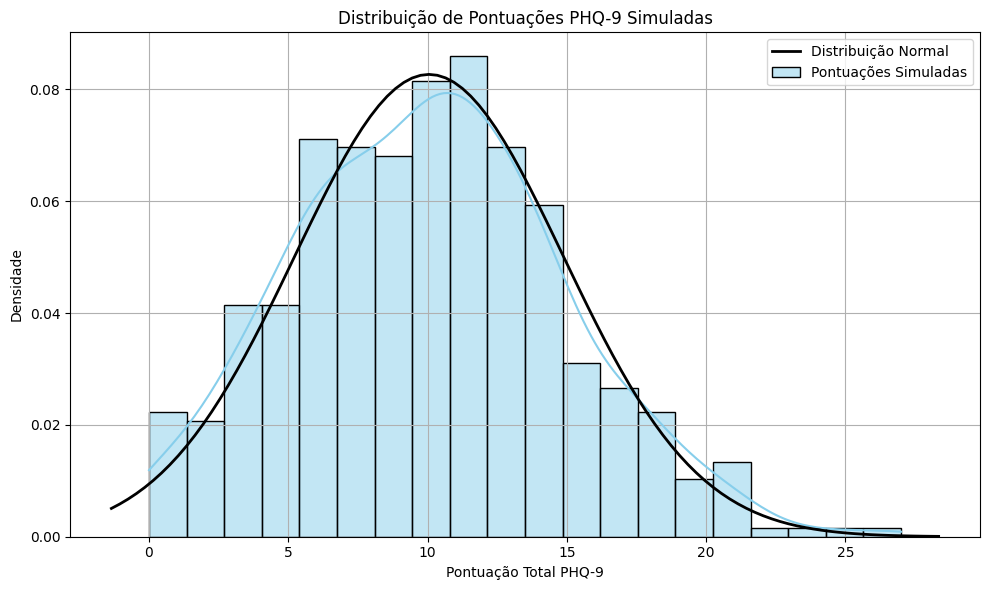

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(pontuacoes, bins=20, kde=True, stat="density", color='skyblue', label='Pontuações Simuladas')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, np.mean(pontuacoes), np.std(pontuacoes))
plt.plot(x, p, 'k', linewidth=2, label='Distribuição Normal')
plt.title('Distribuição de Pontuações PHQ-9 Simuladas')
plt.xlabel('Pontuação Total PHQ-9')
plt.ylabel('Densidade')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Probabilidade de uma pessoa ter pontuação >= 15 e media das pontuaçoes

In [ ]:
media = np.mean(pontuacoes)
dp = np.std(pontuacoes)
limite = 15

print(f"Média das pontuações: {media:.2f}")

Média das pontuações: 10.05


#Versão não padronizada

In [ ]:
prob_nao_padronizada = 1 - norm.cdf(limite, loc=media, scale=dp)
print(f"Probabilidade (não padronizada) de PHQ-9 ≥ 15: {prob_nao_padronizada:.4f}")

Probabilidade (não padronizada) de PHQ-9 ≥ 15: 0.1526


# Versão padronizada

In [ ]:
z = (limite - media) / dp
prob_padronizada = 1 - norm.cdf(z)
print(f"Probabilidade (padronizada) de Z ≥ {z:.2f}: {prob_padronizada:.4f}")

Probabilidade (padronizada) de Z ≥ 1.03: 0.1526


# Resultados

In [ ]:
print(f"Desvio padrão: {dp:.2f}")
print(f"Z-score para pontuação 15: {z:.2f}")

Desvio padrão: 4.82
Z-score para pontuação 15: 1.03


In [ ]:
# 5. Tabela de resultados
tabela = pd.DataFrame({
    'Pontuação PHQ-9': [limite],
    'Z-score': [round(z, 2)],
    'Probabilidade': [round(prob_padronizada, 4)]
})
display(tabela)


,Pontuação PHQ-9,Z-score,Probabilidade
0,15,1.03,0.1526
